### Analyse et comprehension des fichiers

In [17]:
import matplotlib.pyplot as plt
from read_data import *
from utils import *
from fasttext_utils import *
from sklearn.model_selection import train_test_split
import fasttext

**distribution des données**

In [5]:
train,n_train = get_train_data()
test,n_test = get_test_data()

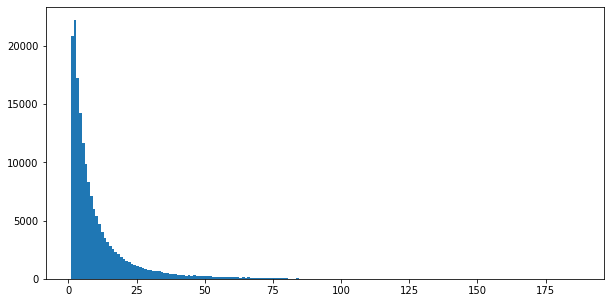

In [6]:
plt.figure(figsize=(10,5))
plt.hist(x=train['hindex'],bins=187);

**selection of sub-dataset with same distribution than the original**

**Tout le dataset (Préalablement enregistré en csv)**

In [7]:
#store_whole_dataset(train,"../tmp/data_part") # si tu n'as pas encore tout le dataset en local

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
174242


In [8]:
# l =[]
# for i in range (18):
#     l.append(pd.read_csv("../tmp/data_part"+str(i+1)+".csv"))

# data = pd.concat(l)
# data = small_class(data, 6)
# data.head()

,author,hindex,text,nb_paper,mean_coauthors_hindex,n_coauthors,modindx,hindex_lab
0,1964267543,4.0,contextual proximity detection or co presence ...,5,21.800000,5,2,__label__2
1,2153592714,13.0,motorola seamless mobility solution is one spe...,5,20.000000,1,0,__label__0
2,217158525,8.0,traditional software development approaches do...,5,2.000000,1,0,__label__0
3,2123103677,11.0,we describe the results of developing the gems...,3,11.833333,6,0,__label__0
4,2067710487,3.0,social software shows fascinating range of usa...,2,9.841160,0,2,__label__2


**Juste 10000 données**

In [18]:
data_path = "../tmp/data_10000.csv"
# data = preprocessing_for_fastText(10000,train)
# data.to_csv(data_path,index=None)
data = pd.read_csv(data_path)
data = small_class(data, 6)
data.head()

,author,hindex,text,nb_paper,mean_coauthors_hindex,n_coauthors,modindx,hindex_lab
0,1969133319,60.0,NaN,0,43.775934,241,5,__label__5
1,2192797973,15.0,we present newly collected data set of gold st...,5,12.000000,6,0,__label__0
2,2568812976,4.0,problem to be solved to provide tv system for ...,5,16.500000,2,1,__label__1
3,2159374572,24.0,this paper presents novel engine coined topx f...,5,16.716981,53,0,__label__0
4,2745744053,22.0,this paper describes coherent optical orthogon...,5,16.000000,4,0,__label__0


In [106]:
data.describe()

,author,hindex,nb_paper,mean_coauthors_hindex,n_coauthors,modindx
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.994911e+09,10.137600,3.896200,15.757368,12.532600,1.855400
std,6.398140e+08,12.814394,1.425563,11.463405,55.682089,1.506824
min,1.139156e+07,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.019859e+09,3.000000,3.000000,8.000000,2.000000,1.000000
50%,2.134432e+09,6.000000,5.000000,12.666667,3.000000,1.000000
75%,2.288160e+09,12.000000,5.000000,20.000000,6.000000,4.000000
max,2.908001e+09,163.000000,5.000000,131.000000,1209.000000,5.000000


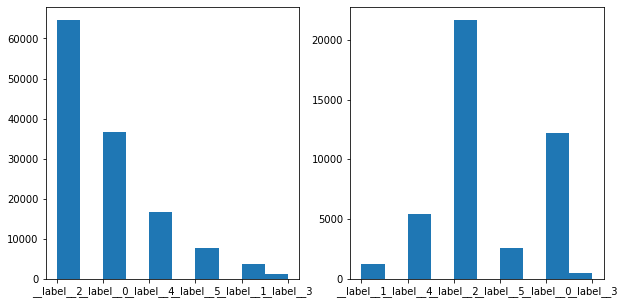

In [10]:
train1,test1 = train_test_split(data,random_state=1)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).hist(train1['hindex_lab'])
plt.subplot(1,2,2).hist(test1['hindex_lab']);

In [11]:
train_path = "../tmp/train1.txt"
test_path = "../tmp/test1.txt"

df_to_txt(train1,train_path)
df_to_txt(test1,test_path)

### Utilisation de Fast text

Les paramètre optimaux ont été optimisés pour 10000 données dans un autre jupyter avec un temps long. Le model 1 nest plus nécessaire!

In [12]:
model0 = fasttext.train_supervised(train_path,lr = 0.626905, dim = 12, epoch = 11, wordNgrams =3)

In [13]:
model2 =  fasttext.train_supervised(train_path,lr = 0.15815, dim = 2, epoch = 33, wordNgrams =3)

In [111]:
# train_duration = 60 # in seconds
#model1 = fasttext.train_supervised(train_path, autotuneValidationFile=test_path)

In [14]:
model0.test(test_path)

(43561, 0.5488854709487845, 0.5488854709487845)

In [15]:
 model2.test(test_path)

(43561, 0.5527191754091964, 0.5527191754091964)

In [114]:
comp = pd.DataFrame({'paramètre':['hidden layer','learning rate','epoch','loss','ngram'],'model0':[model0.dim,model0.lr,model0.epoch,model0.loss,model0.wordNgrams],'model1':[model1.dim,model1.lr,model1.epoch,model1.loss,model0.wordNgrams]})
comp

,paramètre,model0,model1
0,hidden layer,12,2
1,learning rate,0.626905,0.15815
2,epoch,11,33
3,loss,loss_name.softmax,loss_name.softmax
4,ngram,3,3


In [15]:
# comp =general_comp(model1,test1)
# comp.head()

**exploitation de model**

On est sur que le modèle applique softmax sur la représentation du mot. Nous ou choisit donc d'appliquer un autre régresseur

**Data for multiple regression model**

In [115]:
train_core_number = get_core_number(train1["author"])
test_core_number = get_core_number(test1["author"])

train_min_coauthor_hindex = get_min_coauthor_hindex(train1["author"])
test_min_coauthor_hindex = get_min_coauthor_hindex(test1["author"])

train_max_coauthor_hindex = get_max_coauthor_hindex(train1["author"])
test_max_coauthor_hindex = get_max_coauthor_hindex(test1["author"])

train_pagerank = get_page_rank(train1["author"])
test_pagerank = get_page_rank(test1["author"])

X_train,y_train = format_data(train1, model2, train_core_number, train_min_coauthor_hindex, train_max_coauthor_hindex, train_pagerank)
X_test, y_test = format_data(test1, model2, test_core_number, test_min_coauthor_hindex, test_max_coauthor_hindex, test_pagerank)

**Random forest**

In [116]:
# np.save("X_train_10000l2.txt",X_train)
# np.save("y_train_10000l2.txt",y_train)
# np.save("X_test_10000l2.txt",X_test)
# np.save("y_test_10000l2.txt",y_test)

In [34]:
# X_train = np.load("X_train.txt.npy")
# X_test = np.load("X_test.txt.npy")
# y_train = np.load("y_train.txt.npy")
# y_test = np.load("y_test.txt.npy")

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [5]:
forest_model = RandomForestRegressor()

In [35]:
forest_model.max_features

'auto'

In [33]:

#random search
# forest_model = RandomForestRegressor(random_state=1)
# parameters ={
#               'n_estimators': [200],
#                'max_features': ['auto'],
#                'max_depth': [9],
#                'min_samples_split': [2],
#                'min_samples_leaf': [2],
#                'bootstrap': [True, False]
#               }
# forest_grid = GridSearchCV(estimator=forest_model,param_grid = parameters,scoring = 'neg_mean_squared_error',cv =3, n_jobs=-1,verbose=10)
# forest_grid.fit(X_train,y_train)
# print(forest_grid.best_params_)
# print(forest_grid.best_score_)
# mod_preds = forest_grid.predict(X_test)
# mean_squared_error(y_test,mod_preds)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
-71.2168949889441


72.7697150038829

In [117]:
model_forest = RandomForestRegressor()
model_forest.fit(X_train,y_train)
mod_preds = model_forest.predict(X_test)
mean_squared_error(y_test,mod_preds)


71.93226495999998

In [ ]:
# model_forest = RandomForestRegressor(random_state=1)
# model_forest.fit(X_train,y_train)
# mod_preds = model_forest.predict(X_test)
# mean_squared_error(y_test,mod_preds)

**XG_BOOST**

In [12]:
# model_xg = XGBRegressor()
# parameters = {
#     'learning_rate':[0.005,0.01,0.1,0.6],
#     'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     'subsample':[0.5,0.6,0.7,0.8,0.9],
#     'n_estimators':[50,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
#     'objective':['reg:linear']
# }
# model_tune = RandomizedSearchCV(estimator=model_xg,param_distributions = parameters,scoring = 'neg_mean_squared_error',cv =3, n_jobs=-1, n_iter = 100,verbose=10)

# model_tune.fit(X_train,y_train)
# print(model_tune.best_params_)
# print(model_tune.best_score_)
# mod_preds = model_tune.predict(X_test)
# mean_squared_error(y_test,mod_preds)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [118]:
model_xg = XGBRegressor(learning_rate=0.01, max_depth=5, objective="reg:linear", subsample=0.7, n_estimators=500)
model_xg.fit(X_train,y_train)
mod_preds = model_xg.predict(X_test)
mean_squared_error(y_test,mod_preds)

[20:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


70.47377589956076

**test linear regression**

In [66]:
from sklearn import linear_model

reg = linear_model.TweedieRegressor().fit(X_train,y_train)

In [67]:
reg_pred = reg.predict(X_test)

In [68]:
mean_squared_error(y_test,reg_pred)

103.38966332413838

**test svm**

In [27]:
from sklearn.svm import SVC

model_svm =SVC(kernel='sigmoid', C=2)

In [28]:
model_svm.fit(X_train,y_train)

SVC(C=2, kernel='sigmoid')

In [29]:
svm_pred = model_svm.predict(X_test)

KeyboardInterrupt: 

In [ ]:
mean_squared_error(y_test,svm_pred)

155.67465894997932

**Test CNN**

In [ ]:
# mlp = MLP

# Soumission

In [94]:
store_whole_dataset(test,path="../tmp/data_test_part")

10000
20000
30000
40000
43561


In [16]:
from submit import submit
from submit2 import submit2
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
model_xg = XGBRegressor(learning_rate=0.01, max_depth=5, objective="reg:linear", subsample=0.7, n_estimators=500)
submit(forest_model)

43560
